# Приоритизация гипотез. Анализ результатов A/B - теста

Дан список гипотез. Нужно приоритизировать гипотезы с помощью фреймворков: ISE SCORE и RICE SCORE.

А также даны таблицы с результатами проведенного A/B-теста. Нужно проанализировать полученные результаты.

# Изучение общей информации

Загрузим полученные данные, посмотрим на общую информацию о файлах, посмотрим нуждаются ли данные в предобработке, обратим внимание на названия столбцов.

Начнем с данных из таблицы hypothesis(информация о гипотезах):

In [1]:
import pandas as pd
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
#hypothesis.head(5) # вывод на экран первых пяти строк
hypothesis.sample(5)# вывод пяти строк случайным образом

,Hypothesis,Reach,Impact,Confidence,Efforts
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
7,Добавить форму подписки на все основные страни...,10,7,8,5


Посмотрим на общую информацию о файле:

In [2]:
hypothesis.info()
hypothesis.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')

Описание данных:

-	Hypothesis — краткое описание гипотезы;
-	Reach — охват пользователей по 10-балльной шкале;
-	Impact — влияние на пользователей по 10-балльной шкале;
-	Confidence — уверенность в гипотезе по 10-балльной шкале;
-	Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


*Таблица hypothesis состоит из 9 строк и 5 столбцов. В предобработке данных не нуждается. Можно привести названия столбцов к нижнему регистру, чтобы в дальнейшем удобнее было с ними работать.*

Подгрузим следующую таблицу orders(информация о заказах):

In [3]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [4]:
orders.info()
orders.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

Описание данных:

-	transactionId — идентификатор заказа;
-	visitorId — идентификатор пользователя, совершившего заказ;
-	date — дата, когда был совершён заказ;
-	revenue — выручка заказа;
-	group — группа A/B-теста, в которую попал заказ.

*Таблица orders состоит из 1197 строк и 5 столбцов. Столбец 'date' содержит формат даты. Один столбец 'group' - категориальную переменную, остальные три - количественную.*

*Нужно привести данные в столбце 'date' к формату даты, чтобы в дальнейшем была возможность работать с ними.*

Переходим к следующей таблице visitors(информация о пользователях):


In [5]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.tail(5)

,date,group,visitors
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


In [6]:
visitors.info()
visitors.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Index(['date', 'group', 'visitors'], dtype='object')

Описание данных:

-	date — дата;
-	group — группа A/B-теста;
-	visitors — количество пользователей в указанную дату в указанной группе A/B-теста


*Таблица visitors состоит из 62 строк и 3 столбцов. Столбец 'date' содержит формат даты. Один столбец 'group' - категориальную переменную, 'visitors' - количественную.*

*Нужно привести данные в столбце 'date' к формату даты.*

### Вывод:

Получили три таблицы: 

- каждая строка таблицы hypothesis(информация о гипотезах) соответствует одной выдвинутой гипотезе(всего 9). Содержит: название гипотезы; а также оценки, выставленные по 10-бальной шкале: охват пользователей, влияние на пользователей, уверенность в гипотезе, затраты ресурсов на проверку гипотезы. 

- каждая строка таблицы orders(информация о заказах в указанной группе A/B-теста) соответствует одному сделанному заказу. Содержит идентификатор заказа; идентификатор пользователя, совершившего заказ; дату, когда был совершен заказ; сумму выручки от заказа; группу A/B-теста, в которую попал заказ.

- каждая строка таблицы visitors(информация о пользователях в указанной группе A/B-теста) соответствует группе A/B-теста: А или В. Содержит информацию о количестве пользователей в указанной группе в указанную дату.

Переходим к предобработке данных.

# Предобработка данных

1) Приведем названия в столбцах таблицы hypothesis(информация о гипотезах) к нижнему регистру.

2) Приведем данные в столбцах 'date' к формату даты в таблицах orders(информация о заказах в указанной группе A/B-теста) и visitors(информация о пользователях в указанной группе A/B-теста).

Выполнив указанные выше действия, облегчим себе работу с датами: сможем выполнять различные вычисления и т.д. При этом сможем обратиться к любому столбцу в таблицах по названию, не задумываясь в каком регистре они записаны. Т.к. все названия будут приведены к одному виду.

Начнем с преобразований в названиях столбцов:

In [7]:
# Приведем названия в столбцах к нижнему регистру с помощью метода str.lower():
hypothesis.columns = hypothesis.columns.str.lower()
# Проверим замену:
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Для замены типа данных обратимся к методу dt.datetime.strptime() из библиотеки datetime:

In [8]:
import datetime as dt
# заменим в таблице orders
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
# Проверим результат:
orders.dtypes

transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                   int64
group                    object
dtype: object

In [9]:
# заменим в таблице visitors 
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
# Проверим результат:
visitors.dtypes

date        datetime64[ns]
group               object
visitors             int64
dtype: object

### Вывод:

Преобразования в нужных столбцах выполнены. Можем переходить к расчетам.

# Приоритизация гипотез.


1) Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.


2)	Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.


3)	Посмотрим, как изменилась приоритизация гипотез при применении RICE вместо ICE.

Обратимся к таблице hypothesis(информация о гипотезах) - в ней содержится нужная нам информация.

Еще раз выведем на экран описание данных:

-	Hypothesis — краткое описание гипотезы;
-	Reach — охват пользователей по 10-балльной шкале;
-	Impact — влияние на пользователей по 10-балльной шкале;
-	Confidence — уверенность в гипотезе по 10-балльной шкале;
-	Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

1) Воспользуемся формулой:

ICE SCORE = (Impact * Confidence) / Efforts. 

И добавим к таблице hypothesis столбец 'ice' с расчетами:

In [10]:
# Добавим столбец с расчетами и результат округлим до 2 знака после запятой:
hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)
# Установим значение опции: ширина столбца без усечения:
pd.set_option('display.max_colwidth', -1)
# Выведем результат на экран, отсортировав по убыванию
hypothesis.sort_values(by = 'ice', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


*В результате получили: применив фреймворк ICE для приоритизации гипотез - гипотеза "Запустить акцию, дающую скидку на товар в день рождения" имеет самый высокий приоритет: 16.20,* 

*далее следует гипотеза 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей' с приоритетом 13.33*

*Затем, 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' с приоритетом 11.20.* и т.д.

*Самый низкий приоритет имеет гипотеза 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей': 1*

2) Расставим приоритеты, применив фреймворк RICE.

Воспользуемся формулой: 

RICE SCORE = (Reach * impact * confidence) / Efforts. 

Добавим к таблице hypothesis столбец rice:

In [11]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
# Выведем результат на экран, отсортировав по убыванию
hypothesis.sort_values(by = 'rice', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


*В итоге: применив фреймворк RICE для приоритизации гипотез, гипотеза 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' имеет самый высокий приоритет: 112.0,*

*далее следует гипотеза 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа' с приоритетом 56.0*

*Затем гипотеза 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей' с приоритетом 40.0*

*Самый низкий приоритет имеет гипотеза 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей': 3.0*

### Вывод:

Для одних и тех же гипотез приоритеты были расставлены двумя способами: с помощью фреймворка ICE SCORE и его модификации RICE SCORE. Как мы видим результаты получились разными. Связано это с тем, что при расчете ICE SCORE учитывают три параметра: Impact — влияние на пользователей по 10-балльной шкале; Confidence — уверенность в гипотезе по 10-балльной шкале; Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. При расчете RICE SCORE учитывают еще один параметр: Reach — охват пользователей по 10-балльной шкале.




# Анализ А/В-теста

1. Построим график кумулятивной выручки по группам А/В-теста.

Наши действия:

а) создадим массив уникальных пар значений дат и групп теста методом drop_duplicates(); 

б) получим агрегированные кумулятивные по дням данные о заказах;

в) получим агрегированные кумулятивные по дням данные о посетителях;

г) объединим полученные результаты, полученные в шагах б и в, в одну таблицу;

д) построим графики кумулятивной выручки по дням и группам А/В тестирования.

In [12]:
# Создаем массив уникальных пар значений дат и групп теста:
dates_groups = orders[['date', 'group']].drop_duplicates()
dates_groups.head(5)

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [13]:
# получаем агрегированные кумулятивные по дням данные о заказах:
import numpy as np
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                      orders['group'] == x['group'])].\
                                      agg({'date': 'max', 
                                          'group': 'max',
                                          'transactionId': 'nunique',
                                          'visitorId': 'nunique',
                                          'revenue': 'sum'}), axis = 1).sort_values(by = ['date', 'group'])
orders_aggregated.head(5)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [14]:
# получаем агрегированные кумулятивные по дням данные о посетителях:
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                      visitors['group'] == x['group'])].\
                                      agg({'date': 'max', 
                                          'group': 'max',
                                          'visitors': 'sum'}), axis = 1).sort_values(by = ['date', 'group'])
visitors_aggregated.head(5)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [15]:
# объединим полученные агрегированные кумулятивные в одну таблицу:
cummulative_data = orders_aggregated.merge(visitors_aggregated, on = ['date', 'group'])
cummulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cummulative_data.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


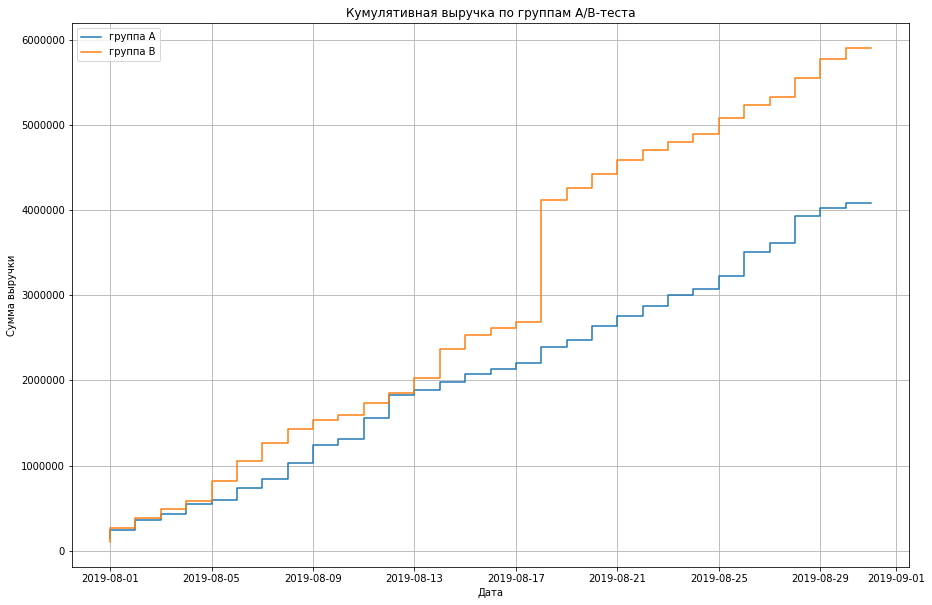

In [16]:
# создадим срезы данных для каждой группы:
cummulative_revenue_a = cummulative_data.query('group == "A"')[['date', 'revenue', 'orders']]
cummulative_revenue_b = cummulative_data.query('group == "B"')[['date', 'revenue', 'orders']]

# построим графики:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.step(cummulative_revenue_a['date'], cummulative_revenue_a['revenue'], label = 'группа A')
plt.step(cummulative_revenue_b['date'], cummulative_revenue_b['revenue'], label = 'группа B')
plt.title('Кумулятивная выручка по группам А/В-теста')
plt.ylabel('Сумма выручки')
plt.xlabel('Дата')
plt.grid()
plt.legend()
plt.show()

*В результате: выручка в группах A и B  с каждым днем начинает постепенно возрастать. После 2019-08-05 мы видим, что выручка в группе В становится выше, чем в группе А. 2019-08-12 выручка выравнивается в группах. Но затем мы снова наблюдаем расхождения в группах тестирования: выручка в группе В выше чем в группе А. Наблюдаем резкий скачок вверх выручки в гр.В 2019-08-18. Возможно это связано с увеличением числа заказов или появлением дорогих заказов. Выручка в группе тестирования А увеличивается с каждым днем равномерно.*

2. Построим график кумулятивного среднего чека по группам А/В-теста.

Разделим кумулятивную выручку на кумулятивное число заказов и построим графики:

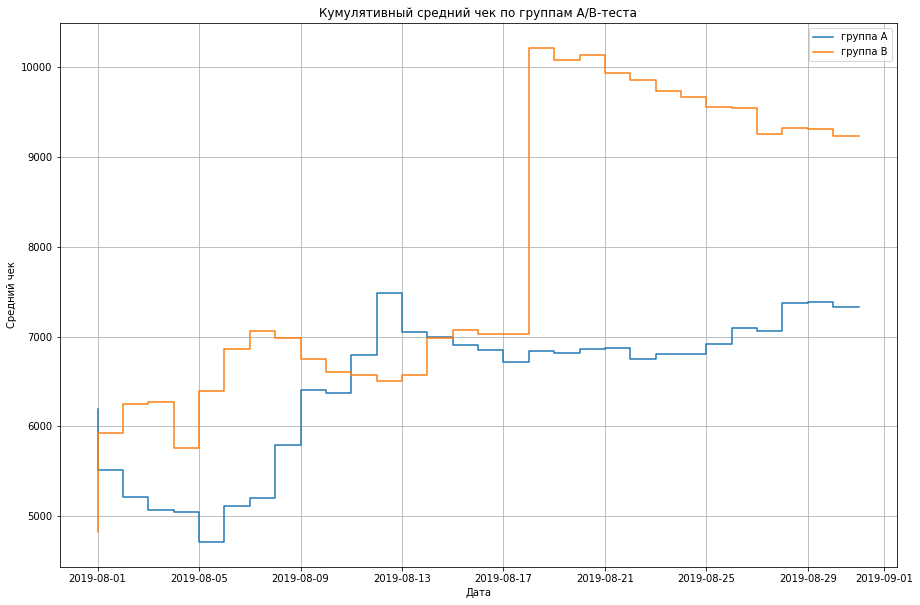

In [17]:
plt.figure(figsize = (15,10))
plt.step(cummulative_revenue_a['date'], cummulative_revenue_a['revenue'] / cummulative_revenue_a['orders'],
         label = 'группа A')
plt.step(cummulative_revenue_b['date'], cummulative_revenue_b['revenue'] / cummulative_revenue_b['orders'],
         label = 'группа B')
plt.title('Кумулятивный средний чек по группам А/В-теста')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid()
plt.legend()
plt.show()

*Итак, на графике наблюдаем колебания среднего чека в группах тестирования с 2019-08-01 по ~ 2019-08-15. После в гр.А средний чек начинает постепенно устанавливаться около одного значения.*

*В гр.В наблюдаем резкий скачок вверх 2019-08-18. И после средний чек начинает постенно уменьшаться с каждым днем.*
*Возможно нужно еще время, чтобы среднему чеку установиться около уровня, приближенного к значению реального среднего чека.*

3.	Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

Каждую точку рассчитаем по формуле: (КУМУЛЯТИВНАЯ МЕТРИКА гр.В) / (КУМУЛЯТИВНАЯ МЕТРИКА гр.(А-1)). 

Но перед расчетами и построением графика объединим данные таблиц: cummulative_revenue_a и cummulative_revenue_b в одну:

In [18]:
merged_cummulative_revenue = cummulative_revenue_a.merge(cummulative_revenue_b, on = 'date', suffixes = ['A', 'B'])
merged_cummulative_revenue.head(5)

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


Сейчас отобразим отношение кумулятивных средних чеков на графике:

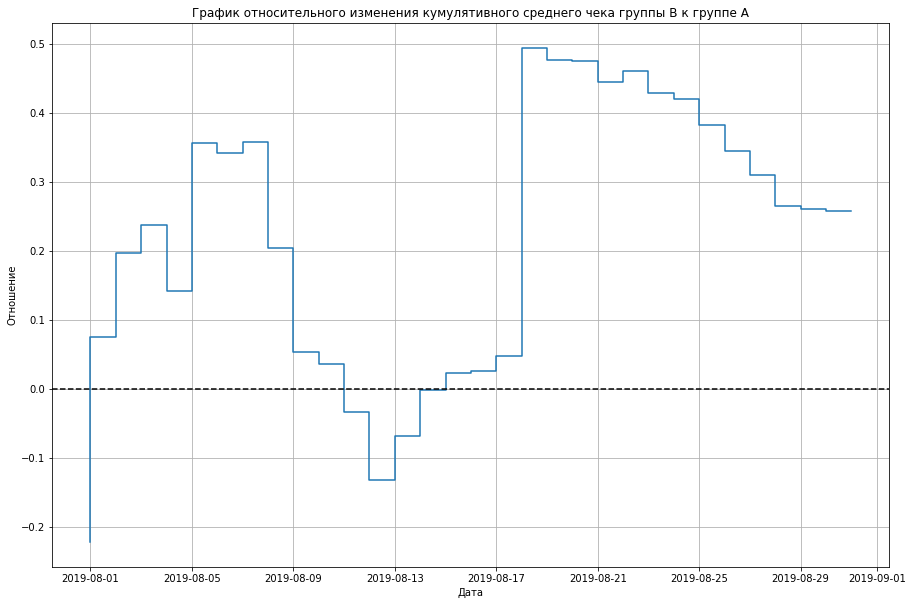

In [19]:
plt.figure(figsize = (15,10))
plt.step(merged_cummulative_revenue['date'], 
         (merged_cummulative_revenue['revenueB'] / merged_cummulative_revenue['ordersB']) /
         (merged_cummulative_revenue['revenueA'] / merged_cummulative_revenue['ordersA']) - 1)
# Добавляем ось x методом axhline():
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение')
plt.show()

*Итак, изменение кумулятивного среднего чека в гр.В  выше, чем в группе А. В некоторые дни наблюдаем резкие скачки. Возможно в эти дни были сделаны заказы на большую сумму.*

4. Построим график кумулятивной конверсии по группам А/В-теста. 

Напомним, что конверсия - это доля людей, перешедших из одного состояния в другой. В нашем случае, доля людей, перешедших из состояния посетителя в состояние покупателя. 

Добавим к таблице cummulative_data столбец 'conversion', который будет содержать вычисленную конверсию для каждой строки:

In [20]:
cummulative_data['conversion'] = cummulative_data['orders'] / cummulative_data['visitors']
# Проверим результат:
cummulative_data.head(5)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


Отфильтруем данные таблицы cummulative_data по группам и создадим соответственно две таблицы:

In [21]:
cummulative_data_А = cummulative_data.query('group == "A"').copy()
cummulative_data_B = cummulative_data.query('group == "B"').copy()

Переходим к построению графиков:

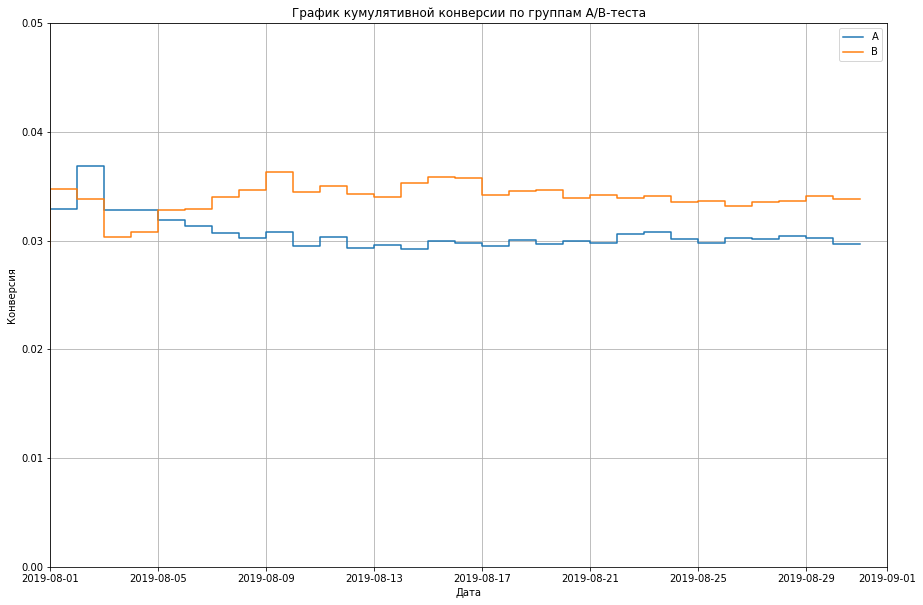

In [22]:
plt.figure(figsize = (15,10))
plt.step(cummulative_data_А['date'], cummulative_data_А['conversion'], label = 'A')
plt.step(cummulative_data_B['date'], cummulative_data_B['conversion'], label = 'B')
plt.grid()
plt.legend()
plt.axis(["2019-08-01", "2019-09-01", 0, 0.05])
plt.title('График кумулятивной конверсии по группам А/В-теста')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.show()

*В начале теста наблюдаем колебания значений в группах. Но после 2019-08-05 конверсия начинает постепенно устанавливаться около одного значения в той и другой группе. Также видим, что конверсия в гр.В выше по сравнению с гр.А. Линий графика "идут" почти параллельно друг другу.*

5. Построим график относительного изменения кумулятивной конверсии группы B к группе A. 

Объединим результаты таблиц cummulative_data_А и cummulative_data_B в одну:

In [23]:
merged_cummulative_conversions = cummulative_data_А[['date', 'conversion']].\
                                 merge(cummulative_data_B[['date', 'conversion']],
                                       on = 'date', 
                                       how = 'left',
                                      suffixes = ['A', 'B'])
merged_cummulative_conversions.head(5)

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


Применим формулу: (КУМУЛЯТИВНАЯ МЕТРИКА гр.В) / (КУМУЛЯТИВНАЯ МЕТРИКА гр.(А-1)). 

Результат отразим на графике:

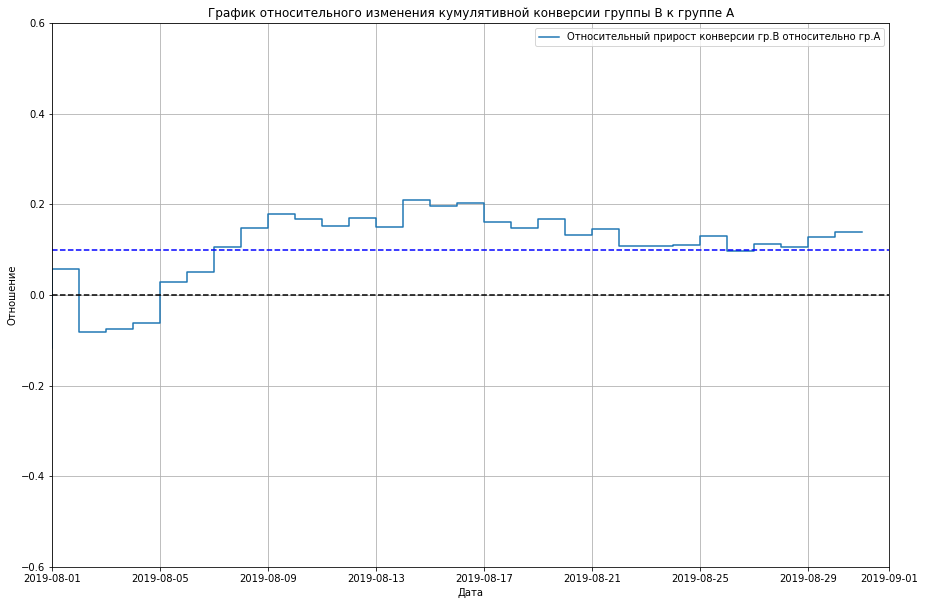

In [24]:
plt.figure(figsize = (15,10))
plt.step(merged_cummulative_conversions['date'], 
         merged_cummulative_conversions['conversionB'] / merged_cummulative_conversions['conversionA'] - 1,
        label = 'Относительный прирост конверсии гр.В относительно гр.А')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.axhline(y = 0.1, color = 'blue', linestyle = '--')
plt.axis(['2019-08-01', '2019-09-01', -0.6, 0.6])
plt.xlabel('Дата')
plt.ylabel('Отношение')
plt.grid()
plt.legend()
plt.show()


*В результате: конверсия в группе В почти на протяжении всего теста выше конверсии в гр.А*

6.	Построим точечный график количества заказов по пользователям.

Обратимся к таблице orders(информация о заказах):

In [25]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


В таблице нас будут интересовать только два столбца: transactionId — идентификатор заказа, visitorId — идентификатор пользователя, совершившего заказ. Поэтому:

1) Исключим из таблицы столбцы: date, revenue, group

2) Затем данные сгруппируем  по идентификатору пользователя

3) Для каждого пользователя найдем количество заказов

In [26]:
ordersByUsers = orders.loc[:, ['transactionId', 'visitorId']].\
                groupby('visitorId', as_index = False).\
                agg({'transactionId': 'count'}) 


In [27]:
# Переименуем столбцы:
ordersByUsers.columns = ['user_id', 'orders']
# Выведем результат на экран, отсортировав 'orders' по убыванию:
ordersByUsers.sort_values(by = 'orders', ascending = False).head(5)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


Построим для полученных данных график рассеивания:

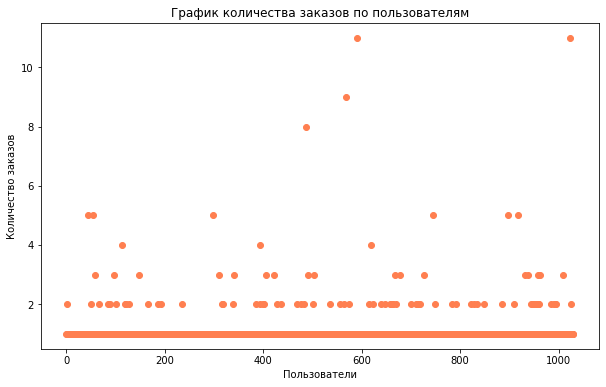

In [28]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize = (10,6))
plt.scatter(x_values, ordersByUsers['orders'], color = 'coral')
plt.title('График количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.show()

*Есть пользователи, у которых количество заказов за время проведения теста больше 2. Но таких меньшинство.   Большинство же пользователей заказали 1-2 раза.*

7.	Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выбирем границу для определения аномальных пользователей.

Воспользуемся методом np.percentile() библиотеки numpy:

In [29]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

*Не более 5% пользователей заказали больше 2 раз за все время проведения теста и не более 1% пользователей - больше 4.*

*Примем количество заказов больше 3 за выбросы.*

8.	Построим точечный график стоимостей заказов.

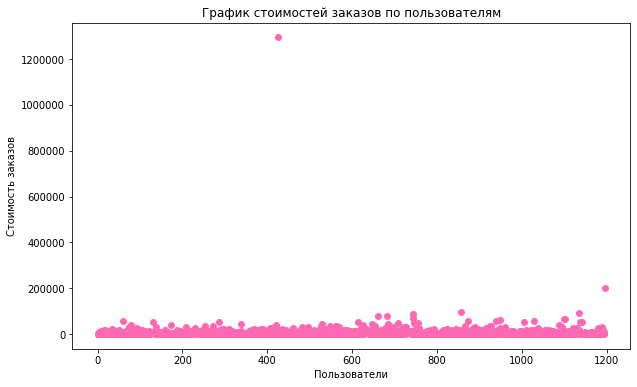

In [30]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize = (10,6))
plt.scatter(x_values, orders['revenue'], color = 'hotpink')
plt.title('График стоимостей заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.show()

*За время проведения теста были сформированы заказы стоимостью выше ~50000 - 100000 рублей. Но таких очень мало.*

9.	Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [31]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

*Не более 5% заказов имеют стоимость выше 28000 руб. и не более 1% - выше 58233.2*

*Примем заказы стоимостью выше 35000 руб. за выбросы.*

10.	Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Обратимся к данным из таблицы orders, в которой содержится информация о заказах пользователей в конкретную дату. 
Найдем для каждого пользователя количество заказов в каждой группе А/В-теста:

In [32]:
# Для группы А:
orders_by_users_a = orders[orders['group'] == 'A'].groupby('visitorId', as_index = False).\
                                                   agg({'transactionId': pd.Series.nunique})
orders_by_users_a.columns = ['user_id', 'orders'] # переименуем столбцы в более понятные
# Для группы В:
orders_by_users_b = orders[orders['group'] == 'B'].groupby('visitorId', as_index = False).\
                                                   agg({'transactionId': pd.Series.nunique})
orders_by_users_b.columns = ['user_id', 'orders'] # переименуем столбцы
# Проверим результат:
#orders_by_users_a.head(5)
orders_by_users_b.head(5)

,user_id,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Сейчас объявим две переменные sample_a, sample_b. 

Состоять переменные будут из двух частей: из списка с количеством заказов, для каждого из пользователей: orders_by_users_a['orders'] и orders_by_users_b['orders'] соответственно; и списка пользователей, которые ничего не заказывали(поставим 0). Их количество определим как разницу между суммой посетителей и количеством записей о заказах. Обратимся к таблице cummulative_data_А и cummulative_data_B соответственно:

In [33]:
#cummulative_data_А.head(5)
cummulative_data_B.head(5)

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,21,20,101217,713,0.029453
3,2019-08-02,B,45,43,266748,1294,0.034776
5,2019-08-03,B,61,59,380996,1803,0.033833
7,2019-08-04,B,78,75,489567,2573,0.030315
9,2019-08-05,B,101,98,581995,3280,0.030793


In [34]:
# Создадим объект pd.Series нужной длины и найдем разницу:
pd.Series(0, index = np.arange(cummulative_data_А['visitors'].sum() - len(orders_by_users_a['orders'])), 
          name = 'orders')
# Соответственно создадим объект pd.Series нужной длины для данных гр.В:
pd.Series(0, index = np.arange(cummulative_data_B['visitors'].sum() - len(orders_by_users_b['orders'])), 
          name = 'orders')

0         0
1         0
2         0
3         0
4         0
         ..
306501    0
306502    0
306503    0
306504    0
306505    0
Name: orders, Length: 306506, dtype: int64

In [35]:
# Создадим объект sample_a с помощью метода pd.concat(): 
#объединим две последовательности orders_by_users_a['orders'] и созданый pd.Series
sample_a = pd.concat([orders_by_users_a['orders'], 
           pd.Series(0, index = np.arange(cummulative_data_А['visitors'].sum() - len(orders_by_users_a['orders'])), 
           name = 'orders')],
                     axis = 0).reset_index()
# Аналогично создадим объект sample_b:
sample_b = pd.concat([orders_by_users_b['orders'], 
           pd.Series(0, index = np.arange(cummulative_data_B['visitors'].sum() - len(orders_by_users_b['orders'])), 
           name = 'orders')],
                     axis = 0).reset_index()

Число элементов в объектах sample_a и sample_b - количество пользователей в каждой группе, сумма всех элементов - количество заказов. Чтобы рассчитать конверсию нужно количество заказов разделить на количество пользователей (другими словами, найти среднее арифметическое). 

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным и относительный прирост конверсии группы В к гр.А  по формуле: (КОНВЕРСИЯ гр.В) / (КОНВЕРСИЯ гр.А - 1). 

Сформулируем нулевую гипотезу: значимых различий между средними значениями в группах тестирования А и В нет.

И альтернативную гипотезу: средние значения в двух группах различны.

Критический уровень статистической значимости = 0.05.

В наших выборках имеются выбросы и распределения не являются нормальными, поэтому применим непараметрический ранговый U-критерий Манна-Уитни:


In [36]:
import scipy.stats as stats
print("p-value:{0:.3f}".format(stats.mannwhitneyu(sample_a['orders'], 
                                                  sample_b['orders'])[1]))

print("Относительный прирост конверсии гр.В к гр.А: {0:.3f}".format(sample_b['orders'].mean() \
                                                                    / sample_a['orders'].mean()-1))


p-value:0.007
Относительный прирост конверсии гр.В к гр.А: 0.144


*Получили: p-value:0.007 < 0.05. Поэтому можем предположить, что  средние значения конверсии в двух группах различны.*

Но действительно ли мы можем утверждать, что средние различны? Построим доверительные интервалы вида: 

Х +- t(1-alpha/2) * se, где se - ошибка среднего, t - критерий Стьюдента.

Воспользуемся методом st.t.interval() библиотеки scipy.stats:

In [37]:
import numpy as np, scipy.stats as st
print("95% доверительный интервал для выборки sample_a", st.t.interval(0.95, len(sample_a['orders'])-1, 
              loc=np.mean(sample_a['orders']), 
              scale=st.sem(sample_a['orders'], ddof = 1)))
print("95% доверительный интервал для выборки sample_b", st.t.interval(0.95, len(sample_b['orders'])-1, 
              loc=np.mean(sample_b['orders']), 
              scale=st.sem(sample_b['orders'], ddof = 1)))

95% доверительный интервал для выборки sample_a (0.0016466106298153268, 0.001997806770478451)
95% доверительный интервал для выборки sample_b (0.0019021218591946457, 0.002266010166387265)


*95% доверительный интервал для среднего выборки sample_a находится левее по сравнению с 95% доверительным интервалом  выборки sample_b. Данный результат подтверждает наше предположение о том, что средние значения конверсии в двух группах различны*

11.	Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Обратимся к таблице orders(информация о заказах) - к столбцу 'revenue'(сумма выручки с заказа в конкретную дату). 

Также как и в предыдущем случае, будем использовать для расчета статистической значимости  ранговый U-критерий Манна-Уитни. Также найдем относительный прирост  группы В к гр.А  по формуле: (КУМУЛЯТИВНАЯ МЕТРИКА гр.В) / (КУМУЛЯТИВНАЯ МЕТРИКА гр.А - 1). 

Сформулируем нулевую гипотезу: значимых различий между  значениями среднего чека  в группах  тестирования A и В нет.

И альтернативную гипотезу: средние значения в двух группах различны.

Критический уровень статистической значимости = 0.05.

In [38]:
import scipy.stats as stats
print("p-value:{0:.3f}".format(stats.mannwhitneyu(orders.query('group == "A"')['revenue'], 
                                                  orders.query('group == "B"')['revenue'])[1]))
print("Относительный прирост {:.3f}".format(orders.query('group == "B"')['revenue'].mean() 
                      / orders.query('group == "A"')['revenue'].mean()-1))

p-value:0.365
Относительный прирост 0.259


*p-value:0.365 > 0.05. Отсюда следует, что у нас нет оснований отвергнуть нулевую гипотезу и  можем предположить, что значимых различий в группах тестирования нет.*

*Также как и в предыдущем случае найдем 95% доверительный интервал:*

In [39]:
print("95% доверительный интервал для выборки в гр.А", st.t.interval(0.95, 
              len(orders.query('group == "A"')['revenue'])-1, 
              loc=np.mean(orders.query('group == "A"')['revenue']), 
              scale=st.sem(orders.query('group == "A"')['revenue'], ddof = 1)))
print("95% доверительный интервал для выборки в гр.В", st.t.interval(0.95, 
              len(orders.query('group == "B"')['revenue'])-1, 
              loc=np.mean(orders.query('group == "B"')['revenue']), 
              scale=st.sem(orders.query('group == "B"')['revenue'], ddof = 1)))

95% доверительный интервал для выборки в гр.А (6347.5360261549595, 8319.620167740912)
95% доверительный интервал для выборки в гр.В (5159.65019499622, 13302.09980500378)


*95% доверительные интервалы двух выборок пересекаются. А это значит, что статистически значимых различий в группах нет.*

12.	Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 

Напомним, что приняли за аномальных пользователей тех, кто совершил заказ стоимостью выше 30000 рублей или сформировал за время проведения теста больше 2 заказов. Узнаем сколько всего аномальных пользователей.

Сначала сохраним в отдельный объект пользователей, совершивших заказ стоимостью выше 35000:

In [40]:
orders_new = orders[orders['revenue'] > 35000]['visitorId'].copy()

orders_new.head(5)

60     4256040402
78     3288820196
131    2254586615
173    2953427180
287    2254456485
Name: visitorId, dtype: int64

Сейчас сохраним в отдельный объект данные о пользователях, совершивших более 2 заказов:

In [41]:
users = orders.groupby('visitorId', as_index = False).agg({'transactionId': 'count'}).\
                       query('transactionId > 3')['visitorId'].copy()
users.head(5)

44     199603092 
55     237748145 
114    457167155 
299    1230306981
393    1614305549
Name: visitorId, dtype: int64

Объединим результаты, удалим дубликаты и найдем количество:

In [42]:
orders_new_users = pd.concat([orders_new, users], axis = 0).drop_duplicates().copy()
orders_new_users.count()

46

Всего 46 аномальных пользователей. Исключим этих пользователей из списка с помощью методов: np.logical_not() и isin().

Создадим переменные sample_a_fildred и sample_b_fildred.

Состоять переменные будут из двух частей: из списка с количеством заказов, для каждого из пользователей: orders_by_users_a['orders'] и orders_by_users_b['orders'] соответственно, но без аномальных пользователей; и списка пользователей, которые ничего не заказывали(поставим 0). Их количество определим как разницу между суммой посетителей и количеством записей о заказах. Обратимся к таблице cummulative_data_А и cummulative_data_B соответственно:

In [43]:
sample_a_fildred = pd.concat([orders_by_users_a[np.logical_not(orders_by_users_a['user_id'].\
                                                               isin(orders_new_users))]['orders'],
                             pd.Series(0, index = np.arange(cummulative_data_А['visitors'].sum() - \
                                                            len(orders_by_users_a['orders'])), 
                                                            name = 'orders')],
                            axis = 0)


sample_b_fildred = pd.concat([orders_by_users_b[np.logical_not(orders_by_users_b['user_id'].\
                                                               isin(orders_new_users))]['orders'],
                             pd.Series(0, index = np.arange(cummulative_data_B['visitors'].sum() - \
                                                            len(orders_by_users_b['orders'])), 
                                                            name = 'orders')],
                            axis = 0)

Вычислим непараметрический  ранговый U-критерий Манна-Уитни и относительный прирост конверсии группы В к гр.А  по формуле: (КОНВЕРСИЯ гр.В) / (КОНВЕРСИЯ гр.А - 1). Критический уровень статистической значимости = 0.05.

In [44]:
import scipy.stats as stats
print("p-value:{0:.3f}".format(stats.mannwhitneyu(sample_a_fildred, 
                                                  sample_b_fildred)[1]))

print("Относительный прирост конверсии гр.В к гр.А: {0:.3f}".format(sample_a_fildred.mean() \
                                                                    / sample_b_fildred.mean()-1))

p-value:0.006
Относительный прирост конверсии гр.В к гр.А: -0.139


*Получили: p-value:0.006 < 0.05. Поэтому можем предположить, что средние значения конверсии в двух группах различны.*

Найдем 95% доверительные интервалы уже по известной формуле:

In [45]:
import numpy as np, scipy.stats as st
print("95% доверительный интервал для выборки sample_a_fildred", st.t.interval(0.95, len(sample_a_fildred)-1, 
              loc=np.mean(sample_a_fildred), 
              scale=st.sem(sample_a_fildred, ddof = 1)))
print("95% доверительный интервал для выборки sample_b_fildred", st.t.interval(0.95, len(sample_b_fildred)-1, 
              loc=np.mean(sample_b_fildred), 
              scale=st.sem(sample_b_fildred, ddof = 1)))

95% доверительный интервал для выборки sample_a_fildred (0.0014777162234166365, 0.0017809982202789288)
95% доверительный интервал для выборки sample_b_fildred (0.0017311712450893645, 0.0020530931193203134)


*95% доверительный интервал для среднего выборки sample_a_fildred находится левее по сравнению с 95% доверительным интервалом выборки sample_b_fildred. Данный результат подтверждает наше предположение о том, что средние значения конверсии в двух группах различны (по очищенным данным)*

13.	Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [46]:
print("p-value:{0:.3f}".format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                                                        np.logical_not(orders['visitorId'].isin(orders_new_users)))]\
                                                 ['revenue'],
                                                 orders[np.logical_and(orders['group'] == 'B',
                                                        np.logical_not(orders['visitorId'].isin(orders_new_users)))]\
                                                 ['revenue'])[1]))
print("Относительный прирост {:.3f}".format(orders[np.logical_and(orders['group'] == 'B',
                                                        np.logical_not(orders['visitorId'].isin(orders_new_users)))]\
                                                 ['revenue'].mean() /
                                                  orders[np.logical_and(orders['group'] == 'A',
                                                        np.logical_not(orders['visitorId'].isin(orders_new_users)))]\
                                                 ['revenue'].mean() - 1))

p-value:0.493
Относительный прирост 0.018


*p-value:0.493 > 0.05. Отсюда следует, что у нас нет оснований отвергнуть нулевую гипотезу и можем предположить, что значимых различий в группах тестирования нет.*

Найдем 95% доверительные интервалы:

In [47]:
print("95% доверительный интервал для выборки гр.А", st.t.interval(0.95, len(orders[np.logical_and(orders['group'] == 'A',
                                                        np.logical_not(orders['visitorId'].isin(orders_new_users)))]\
                                                 ['revenue'])-1, 
              loc=np.mean(orders[np.logical_and(orders['group'] == 'A',
                                                        np.logical_not(orders['visitorId'].isin(orders_new_users)))]\
                                                 ['revenue']), 
              scale=st.sem(orders[np.logical_and(orders['group'] == 'A',
                                                        np.logical_not(orders['visitorId'].isin(orders_new_users)))]\
                                                 ['revenue'], ddof = 1)))
print("95% доверительный интервал для выборки гр.В", st.t.interval(0.95, len(orders[np.logical_and(orders['group'] == 'B',
                                                        np.logical_not(orders['visitorId'].isin(orders_new_users)))]\
                                                 ['revenue'])-1, 
              loc=np.mean(orders[np.logical_and(orders['group'] == 'B',
                                                        np.logical_not(orders['visitorId'].isin(orders_new_users)))]\
                                                 ['revenue']), 
              scale=st.sem(orders[np.logical_and(orders['group'] == 'B',
                                                        np.logical_not(orders['visitorId'].isin(orders_new_users)))]\
                                                 ['revenue'], ddof = 1)))

95% доверительный интервал для выборки гр.А (5045.0895011754965, 6209.3040731216915)
95% доверительный интервал для выборки гр.В (5155.424573912291, 6307.074565502511)


*Предполагаем, что статистически значимых различий между значениями среднего чека в группах тестирования А и В (по очищенным данным нет), т.к. 95% доверительные интервалы пересекаются*

# Вывод:

В ходе работы над проектом были получены следующие результаты:

1. Было установлено статистически значимое различие между средними значениями конверсии (переход из посетителей в покупатели) между двумя группами тестирования.

По "сырым" данным статистически значимое различие было достигнуто при p-value:0.007 и критическим уровнем значимости = 0.05. 

95% доверительный интервал для среднего в гр.А: (0.0016466106298153268, 0.001997806770478451), в гр.В: (0.0019021218591946457, 0.002266010166387265). 

По "очищенным" данным: при  p-value:0.006 и критическим уровнем значимости = 0.05. 

95% доверительный интервал среднего в гр.А: ((0.0014777162234166365, 0.0017809982202789288), в гр.В: (0.0017311712450893645, 0.0020530931193203134))

2. Также было установлено: значимых различий среднего чека в двух группах тестирования нет.

По "сырым" данным статистически значимое различие не было достигнуто при p-value:0.365 и критическим уровнем значимости = 0.05.

95% доверительный интервал для среднего в гр.А: (6347.5360261549595, 8319.620167740912), в гр.В: (5159.65019499622, 13302.09980500378).

По "очищенным" данным: при p-value:0.493 и критическим уровнем значимости = 0.05.

95% доверительный интервал среднего в гр.А: (5045.0895011754965, 6209.3040731216915), в гр.В: (5155.424573912291, 6307.074565502511).

3. График различия конверсии между группами сообщает, что результат гр.В лучше чем в гр.А практически на протяжении всего времени проведения теста:

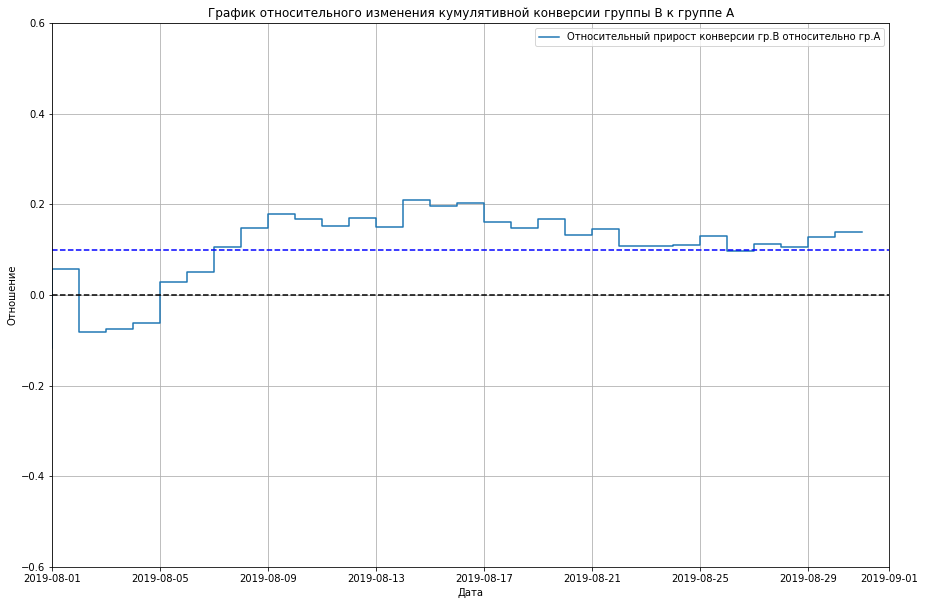

In [48]:
plt.figure(figsize = (15,10))
plt.step(merged_cummulative_conversions['date'], 
         merged_cummulative_conversions['conversionB'] / merged_cummulative_conversions['conversionA'] - 1,
        label = 'Относительный прирост конверсии гр.В относительно гр.А')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.axhline(y = 0.1, color = 'blue', linestyle = '--')
plt.axis(['2019-08-01', '2019-09-01', -0.6, 0.6])
plt.xlabel('Дата')
plt.ylabel('Отношение')
plt.grid()
plt.legend()
plt.show()


4. График различия среднего чека говорит о том, что средний чек в гр.В еще не достиг реального уровня значения среднего чека. И ближе к окончанию теста с каждым днем уменьшается:

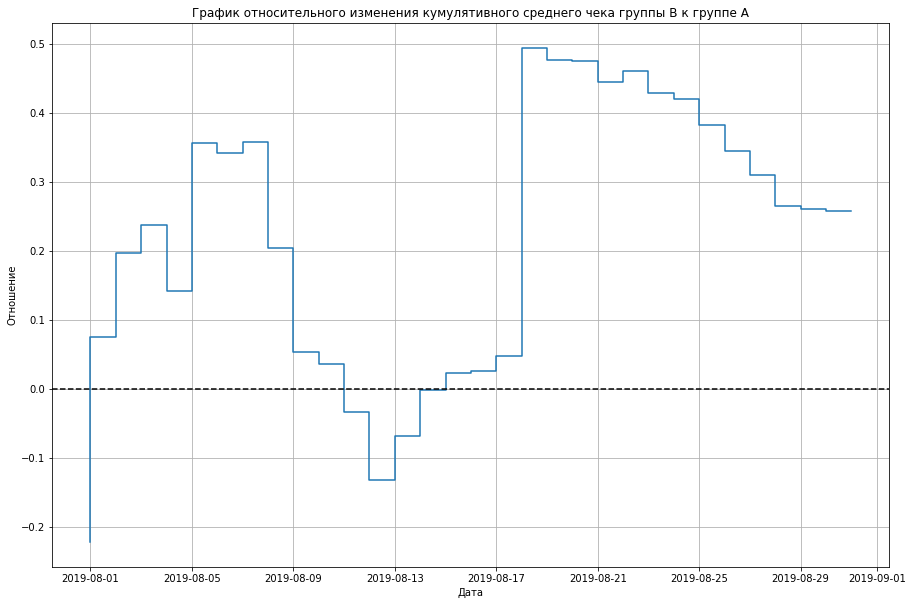

In [49]:
plt.figure(figsize = (15,10))
plt.step(merged_cummulative_revenue['date'], 
         (merged_cummulative_revenue['revenueB'] / merged_cummulative_revenue['ordersB']) /
         (merged_cummulative_revenue['revenueA'] / merged_cummulative_revenue['ordersA']) - 1)
# Добавляем ось x методом axhline():
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение')
plt.show()

Исходя из вышесказанного, предлагаю остановить тест и зафиксировать победу группы В.